<a href="https://colab.research.google.com/github/A23929/MDSC-302-Assignments/blob/main/22237_MDSC_302(P)_Pretraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision

In [2]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:05<00:00, 32473666.99it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

<ipython-input-4-bf9919741f16>:21: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plt.imshow(img.T, cmap="gray")


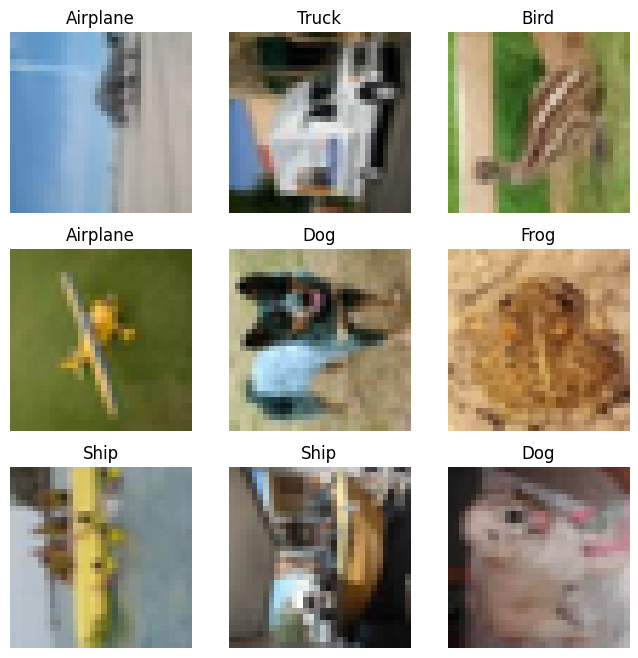

In [4]:
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.T, cmap="gray")
plt.show()

In [7]:
train_size = int(0.9*(len(train_data)))
val_size = len(train_data) - train_size
train_set, val_set = random_split(train_data, [train_size, val_size])

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


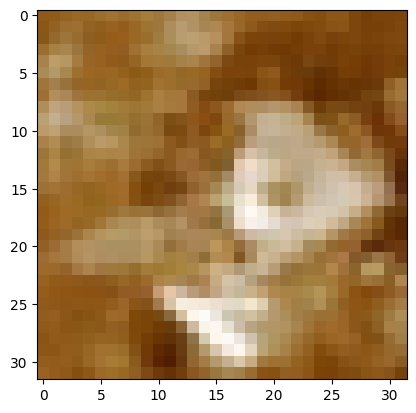

Label: 3


In [9]:
train_features,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
plt.imshow(img.T,cmap='gray')
plt.show()
print(f"Label: {label}")

In [12]:
torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [13]:
model = torchvision.models.resnet50(weights = None, progress = True)

In [14]:
model.fc = nn.Linear(2048,10,bias = True)

In [15]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
epochs = 15
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [17]:
tloss = []
tacc = []
vloss = []
vacc = []

In [19]:
for epochs in range(20):
  running_loss = 0.0
  num_correct = 0

  print(f"Epoch {epochs+1}\n------------------------------------------")

  for inputs, labels in train_dataloader:
    inputs = inputs.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    running_loss += loss.item()
    optimizer.step()
    _, idx = outputs.max(dim=1)
    num_correct += (idx == labels).sum().item()

  print('Loss: {} Accuracy: {}'.format(running_loss/len(train_dataloader),
  (num_correct/len(train_dataloader))/100))

  tloss.append(running_loss/len(train_dataloader))
  tacc.append((num_correct/len(train_dataloader))/100)

  size = len(val_dataloader.dataset)
  num_batches = len(val_dataloader)
  val_loss, correct = 0, 0

  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        # print(inputs.shape)
        pred = model(inputs)
        val_loss += loss_fn(pred, labels).item()
        correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

    val_loss /= num_batches
    correct /= size
    print(f"Validation error : \n Accuracy: {(correct)}, Avg loss: {val_loss:>8f} \n")

  vloss.append(val_loss)
  vacc.append(correct)

Epoch 1
------------------------------------------
Loss: 2.114931521598588 Accuracy: 0.14757102272727274
Validation error : 
 Accuracy: 0.3036, Avg loss: 1.969172 

Epoch 2
------------------------------------------
Loss: 1.8552920830182054 Accuracy: 0.2026278409090909
Validation error : 
 Accuracy: 0.3552, Avg loss: 1.763161 

Epoch 3
------------------------------------------
Loss: 1.6254173234443774 Accuracy: 0.25842329545454545
Validation error : 
 Accuracy: 0.4204, Avg loss: 1.566936 

Epoch 4
------------------------------------------
Loss: 1.4950089571489529 Accuracy: 0.2915056818181818
Validation error : 
 Accuracy: 0.4578, Avg loss: 1.494746 

Epoch 5
------------------------------------------
Loss: 1.41585761918263 Accuracy: 0.31039772727272724
Validation error : 
 Accuracy: 0.4952, Avg loss: 1.411468 

Epoch 6
------------------------------------------
Loss: 1.3320588129995898 Accuracy: 0.3303125
Validation error : 
 Accuracy: 0.4896, Avg loss: 1.405625 

Epoch 7
-----------

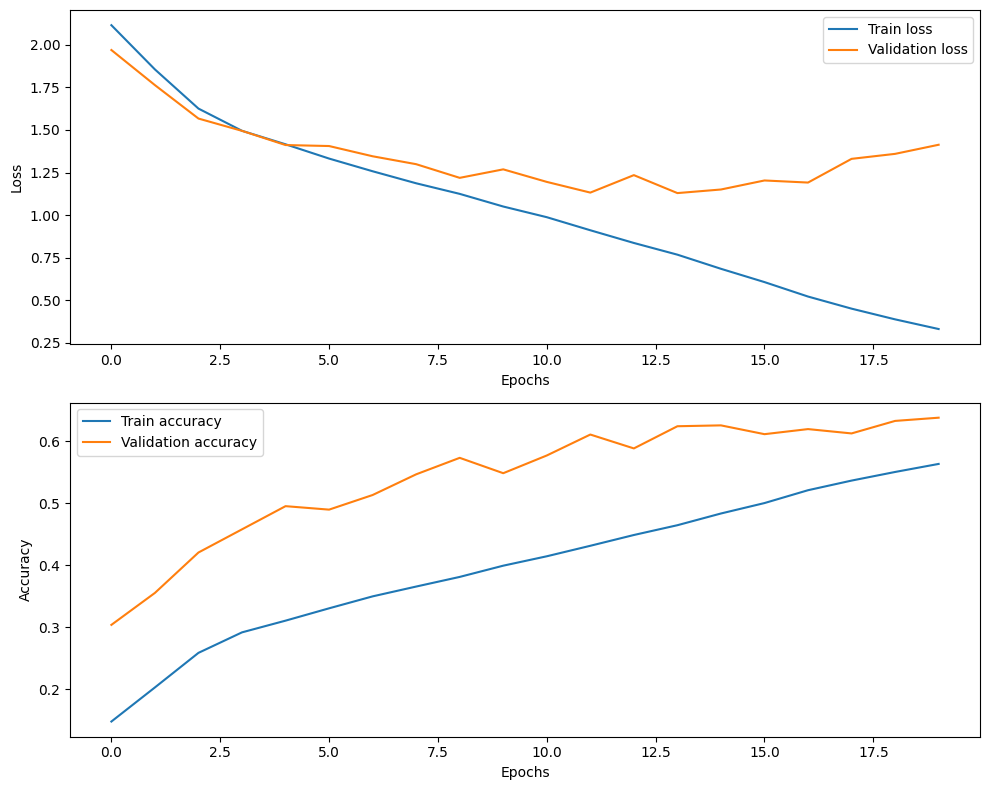

In [20]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,8))
ax1.plot(range(0,epochs+1),tloss,label='Train loss')
ax1.plot(range(0,epochs+1),vloss,label='Validation loss')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2.plot(range(0,epochs+1),tacc,label='Train accuracy')
ax2.plot(range(0,epochs+1),vacc,label='Validation accuracy')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()